# 합성곱 신경망(CNN)
---
- Fashion-mnist 데이터셋

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape) # 60000, 28, 28인 이유는 rgb데이터도 포함하기 때문
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
# 시각화

samples = np.random.randint(60000, size = 9)
samples

array([41502, 34899, 46358,  8177, 55649, 33609, 12234, 59397, 56817])

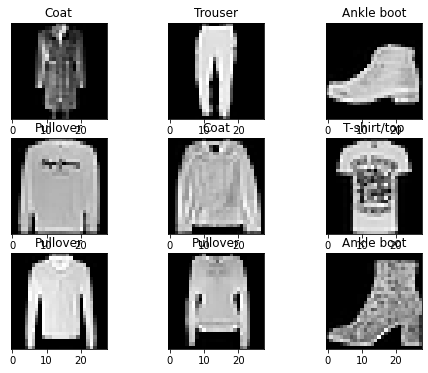

In [6]:
plt.figure(figsize = (8,6))
for i, idx in enumerate(samples): # enumerate 이너머레이트는 value의 값과 index의 값을 같이 가져온다.
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[idx], cmap='gray')
  plt.yticks([])
  # plt.xticks([])
  plt.title(class_name[y_train[idx]])
  
plt.show()

### 검증용 데이터 (Validation Data)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(42000, 28, 28) (18000, 28, 28)
(42000,) (18000,)


### 정규화

In [8]:
x_train = x_train.astype('float32')/255.
x_val = x_val/255.
x_test = x_test/255.

In [9]:
np.min(x_train), np.max(x_train)

(0.0, 1.0)

In [10]:
y_train[:10]

array([8, 1, 0, 6, 8, 0, 5, 2, 4, 0], dtype=uint8)

In [11]:
# 원핫인코딩 (다중분류의 경우)

from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

In [12]:
y_train_oh[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
x_train.shape

(42000, 28, 28)

In [14]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_train.shape

(42000, 28, 28, 1)

In [15]:
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

### 모델

In [18]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                  input_shape=(28, 28, 1)), # 흑백일때는 1, rgb일때는 3
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'), # 흑백일때는 1, rgb일때는 3
    layers.MaxPool2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(units = 256, activation ='relu', input_shape = (784,)),
    layers.Dense(units = 64, activation ='relu'),
    layers.Dense(units = 32, activation ='relu'),
    layers.Dense(units = 16, activation ='relu'),
    layers.Dense(units = 10, activation ='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics =['acc']
)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [20]:
%%time
# 학습합니다.

EPOCHS = 50
BATCH_SIZE = 32

log = model.fit(x_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data = (x_val, y_val_oh),
                    verbose = 1)

Epoch 1/50
1313/1313 [==============================] - 16s 4ms/step - loss: 0.5939 - acc: 0.7861 - val_loss: 0.3876 - val_acc: 0.8589
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3552 - acc: 0.8697 - val_loss: 0.3346 - val_acc: 0.8783
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2974 - acc: 0.8914 - val_loss: 0.3202 - val_acc: 0.8809
Epoch 4/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2638 - acc: 0.9047 - val_loss: 0.3108 - val_acc: 0.8875
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2310 - acc: 0.9149 - val_loss: 0.2701 - val_acc: 0.9026
Epoch 6/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2070 - acc: 0.9236 - val_loss: 0.2689 - val_acc: 0.9047
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1790 - acc: 0.9343 - val_loss: 0.2692 - val_acc: 0.9049
Epoch 8/50
1313/1313 [==============================] - 6s 4m

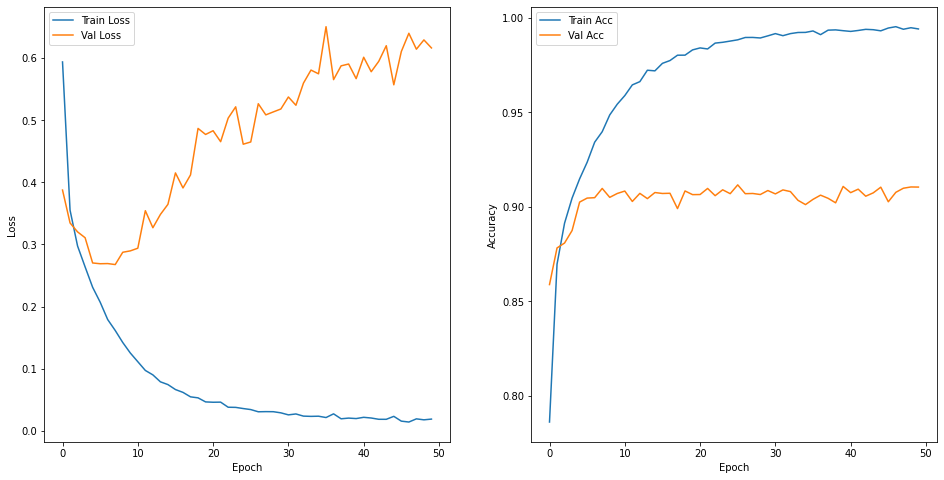

In [21]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Acc')

    plt.legend()
    plt.show()

plot_history(log) # 그래프가 벌어지면 과적합현상이 생기기 시작한것.

In [22]:
# 평가


model.evaluate(x_train, y_train_oh)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0085 - acc: 0.9970


[0.008502420037984848, 0.996999979019165]

In [23]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 1s 2ms/step - loss: 0.6959 - acc: 0.9048


[0.6959348917007446, 0.9047999978065491]

In [24]:
# 예측

y_pred = model.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.71028678e-19, 4.86167348e-30, 2.96435060e-31, 4.51747255e-17,
        1.93633869e-19, 1.82928941e-15, 2.06028575e-12, 1.29418525e-11,
        3.52543165e-21, 1.00000000e+00],
       [4.74711526e-15, 6.67767298e-22, 1.00000000e+00, 3.28086142e-16,
        2.32238395e-11, 2.56925097e-31, 4.86449856e-13, 0.00000000e+00,
        2.11515032e-16, 0.00000000e+00],
       [1.46914631e-23, 1.00000000e+00, 3.78134651e-26, 3.36711849e-16,
        1.24780045e-37, 0.00000000e+00, 6.36808171e-17, 0.00000000e+00,
        1.19379068e-26, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 6.91528091e-25,
        0.00000000e+00, 0.00000000e+00, 2.11014900e-28, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.15080697e-04, 3.65074437e-09, 9.22092513e-05, 1.08759339e-08,
        4.61158152e-07, 2.28259567e-09, 9.99392152e-01, 1.93245489e-11,
        1.56751434e-09, 2.13627300e-14]], dtype=float32)

In [25]:
y_pred = np.argmax(y_pred, axis = 1)

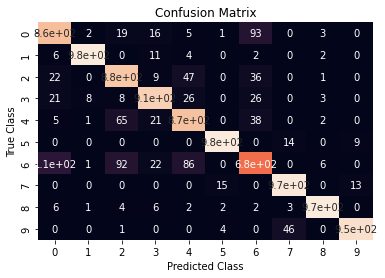

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cfm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cfm, annot = True, cbar = False)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

In [27]:
samples = np.where((y_test == y_pred ) == False)[0]
# samples
samples = np.random.choice(samples, 9)
samples

array([7974, 9455, 5592, 4623, 4746, 3767, 3290, 3804, 1029])

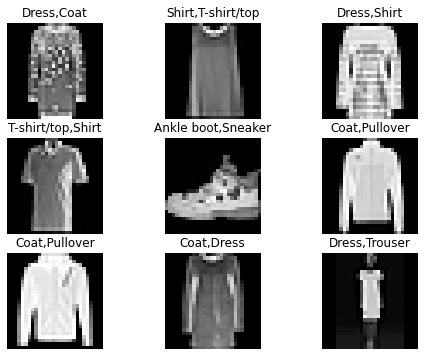

In [28]:
plt.figure(figsize = (8,6))
for i, idx in enumerate(samples): # enumerate 이너머레이트는 value의 값과 index의 값을 같이 가져온다.
  plt.subplot(3, 3, i+1)
  plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
  plt.axis('off')
  plt.title(f'{class_name[y_test[idx]]},{class_name[y_pred[idx]]}')
  
plt.show()